Import libraries

In [1]:
import diplib

import cv2
import numpy as np
from IPython.display import Video
from matplotlib import pyplot as plt

Set source path

In [2]:
src = './homework2/hand2.mp4'
dest = './homework2/hand2-detected.mp4'
frames = diplib.get_video_frames(src) # [:60]

Histogram analysis

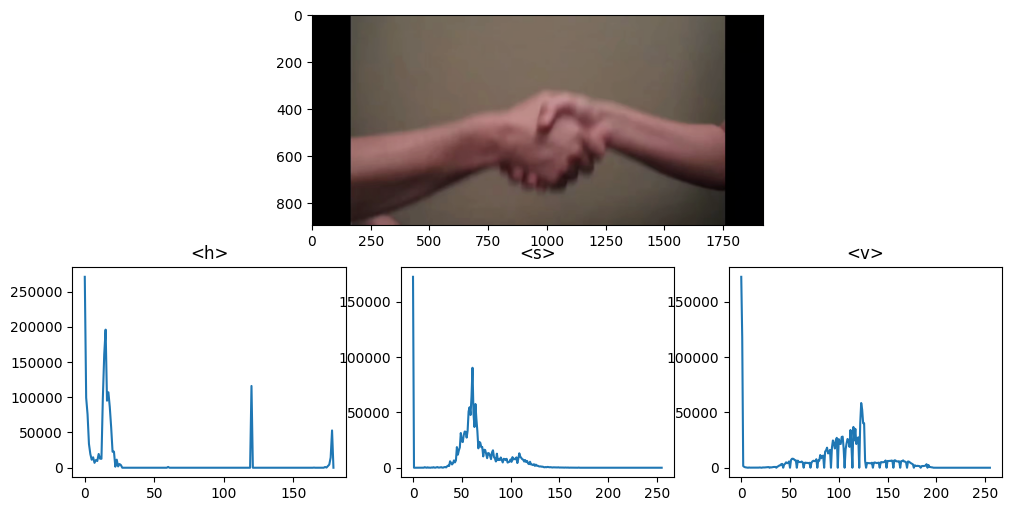

In [3]:
img = frames[30]
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB))

hist_h = cv2.calcHist([hsv], [0], None, [180], [0, 179])
plt.subplot(2, 3, 4)
plt.plot(hist_h)
plt.title('<h>')

hist_s = cv2.calcHist([hsv], [1], None, [256], [0, 255])
plt.subplot(2, 3, 5)
plt.plot(hist_s)
plt.title('<s>')

hist_v = cv2.calcHist([hsv], [2], None, [256], [0, 255])
plt.subplot(2, 3, 6)
plt.plot(hist_v)
plt.title('<v>')

plt.show()

Apply operations to detect objects
  1. Thresholding with hue
  2. Negative transform
  3. Thresholding
  4. Delete background (including black margin at sides)
  5. Connect components

In [4]:
hsv_frames = diplib.frames_rgb_to_hsv(frames)

h_frames = hsv_frames[:,:,:,0]
h_frames = ~diplib.thresholding(h_frames.copy(), 10, 25)

rgb_frames = np.empty_like(hsv_frames)
rgb_frames[:,:,:,0] = h_frames
rgb_frames[:,:,:,1] = h_frames
rgb_frames[:,:,:,2] = h_frames

rgb_frames = diplib.thresholding(rgb_frames.copy(), 250, 255)
for idx, frame in enumerate(frames):
    rgb_frames[idx, frame < 10] = 0
connected_frames = diplib.connect_components(rgb_frames, frames, 10000)

fps = cv2.VideoCapture(src).get(cv2.CAP_PROP_FPS)
diplib.export_video(dest, connected_frames, fps=fps)
Video(dest)